### Importing Libraries

In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CNN_

In [ ]:
def generator(
    dir,
    gen=image.ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(224, 224),
    class_mode="categorical",
):

    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )


BS = 32
TS = (24, 24)
train_batch = generator("/content/drive/MyDrive/Dataset_update/Train_directory", shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator("/content/drive/MyDrive/Dataset_update/Test_directory", shuffle=True, batch_size=BS, target_size=TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

img, labels = next(train_batch)
print(img.shape)

Found 3598 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
112 12
(32, 24, 24, 1)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]
)
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
cnn_model.fit(
    train_batch,
    validation_data=valid_batch,
    epochs=10,
    steps_per_epoch=SPE,
    validation_steps=VS,
)
cnn_model.save("cnn_model.h5", overwrite=True)


Epoch 1/10
112/112 [==============================] - 911s 8s/step - loss: 0.3457 - accuracy: 0.8511 - val_loss: 0.4014 - val_accuracy: 0.8438
Epoch 2/10
112/112 [==============================] - 6s 54ms/step - loss: 0.1392 - accuracy: 0.9526 - val_loss: 0.5267 - val_accuracy: 0.8021
Epoch 3/10
112/112 [==============================] - 6s 52ms/step - loss: 0.1036 - accuracy: 0.9615 - val_loss: 0.8712 - val_accuracy: 0.7865
Epoch 4/10
112/112 [==============================] - 6s 56ms/step - loss: 0.0992 - accuracy: 0.9599 - val_loss: 0.5943 - val_accuracy: 0.8151
Epoch 5/10
112/112 [==============================] - 6s 52ms/step - loss: 0.0979 - accuracy: 0.9644 - val_loss: 0.4547 - val_accuracy: 0.8203
Epoch 6/10
112/112 [==============================] - 6s 57ms/step - loss: 0.0968 - accuracy: 0.9619 - val_loss: 0.7564 - val_accuracy: 0.7865
Epoch 7/10
112/112 [==============================] - 6s 52ms/step - loss: 0.0784 - accuracy: 0.9694 - val_loss: 0.4300 - val_accuracy: 0.7917

In [ ]:
validation_loss, validation_accuracy = cnn_model.evaluate(valid_batch, steps=VS)
print("Validation Accuracy:", validation_accuracy)

In [ ]:
from tensorflow.keras.models import load_model


cnn_model = load_model("/content/drive/MyDrive/Dataset_update/cnn_model.h5")


13/13 [==============================] - 165s 13s/step


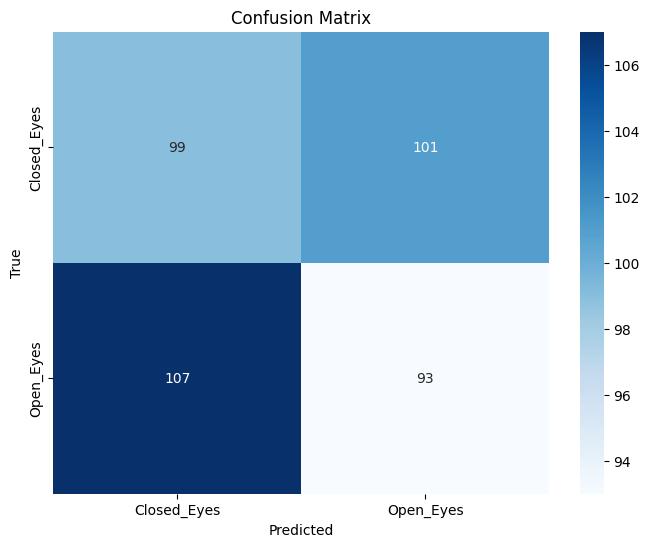


Classification Report:
              precision    recall  f1-score   support

 Closed_Eyes       0.48      0.49      0.49       200
   Open_Eyes       0.48      0.47      0.47       200

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_true = valid_batch.classes
valid_batch.reset()
y_pred = cnn_model.predict(valid_batch, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = valid_batch.class_indices
class_names = {v: k for k, v in class_names.items()}
class_names = list(class_names.values())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 [==============================] - 0s 135ms/step
Predicted Label CNN: Closed


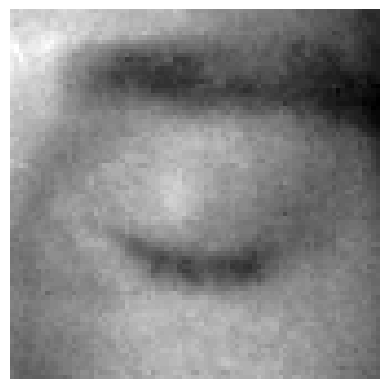

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

cnn_model = load_model("/content/drive/MyDrive/Dataset_update/cnn_model.h5")

image_path = '/content/drive/MyDrive/Dataset_update/Train_directory/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png'
eye_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_eye = cv2.resize(eye_image, (24, 24))
input_image = np.expand_dims(resized_eye, axis=0)
input_image = input_image / 255.0
prediction = cnn_model.predict(input_image)
predicted_label = 'Closed' if prediction[0][0] > 0.5 else 'Open'
print("Predicted Label CNN:", predicted_label)

# Display the image using matplotlib
plt.imshow(eye_image, cmap='gray')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 145ms/step
Predicted Label CNN: Open


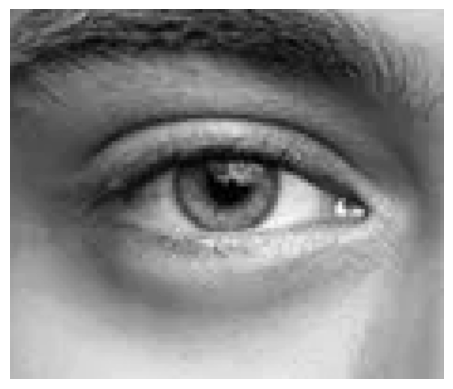

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

cnn_model = load_model("/content/drive/MyDrive/Dataset_update/cnn_model.h5")

image_path = '/content/drive/MyDrive/Dataset_update/Screenshot 2023-08-02 at 12.09.34 PM.png'
eye_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_eye = cv2.resize(eye_image, (24, 24))
input_image = np.expand_dims(resized_eye, axis=0)
input_image = input_image / 255.0
prediction = cnn_model.predict(input_image)
predicted_label = 'Closed' if prediction[0][0] > 0.5 else 'Open'
print("Predicted Label CNN:", predicted_label)

# Display the image using matplotlib
plt.imshow(eye_image, cmap='gray')

plt.axis('off')
plt.show()
